# WEB SCRAPING

https://pub.towardsai.net/the-ultimate-beginner-guide-to-web-scraping-64a519f8adce

# Beautiful Soup

https://realpython.com/beautiful-soup-web-scraper-python/


## 1. Entrar en la página web en cuestión y familiarizarse con su estructura.

Urls: 

           https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
           
1. The base URL represents the path to the search functionality of the website. In the example above, the base URL is https://realpython.github.io/fake-jobs/.
2. The specific site location that ends with .html is the path to the job description’s unique resource.

URLs can hold more information than just the location of a file. Some websites use query parameters to encode values that you submit when performing a search. You can think of them as query strings that you send to the database to retrieve specific records. You’ll find query parameters at the end of a URL. For example, if you go to Indeed and search for “software developer” in “Australia” through their search bar, you’ll see that the URL changes to include these values as query parameters:

        https://au.indeed.com/jobs?q=software+developer&l=Australia
        
Query parameters consist of three parts:

1. Start: The beginning of the query parameters is denoted by a question mark (?).
2. Information: The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).
3. Separator: Every URL can have multiple query parameters, separated by an ampersand symbol (&).

## 2. Inspect the Site Using Developer Tools

Developer tools:

In Chrome on macOS, you can open up the developer tools through the menu by selecting View → Developer → Developer Tools. On Windows and Linux, you can access them by clicking the top-right menu button (⋮) and selecting More Tools → Developer Tools. You can also access your developer tools by right-clicking on the page and selecting the Inspect option or using a keyboard shortcut:

    Mac: Cmd+Alt+I
    Windows/Linux: Ctrl+Shift+I

Developer tools allow you to interactively explore the site’s document object model (DOM) to better understand your source. To dig into your page’s DOM, select the Elements tab in developer tools. You’ll see a structure with clickable HTML elements. You can expand, collapse, and even edit elements right in your browser:

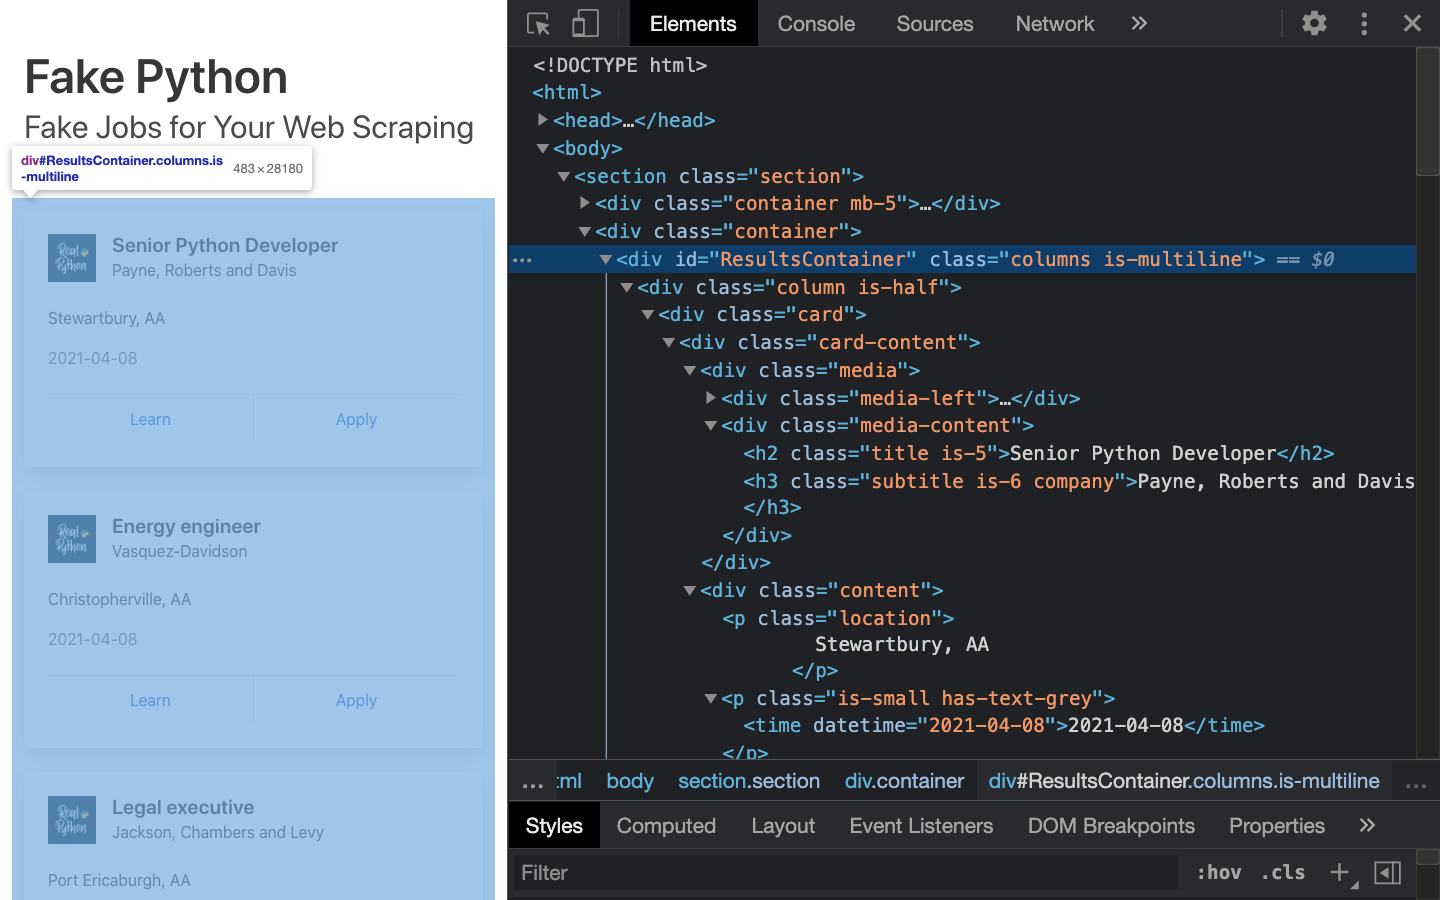

## 3. Scrape HTML Content From a Page

First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it. For this task, you’ll use Python’s requests library.

    python -m pip install requests
    
Then open up a new file in your favorite text editor. All you need to retrieve the HTML are a few lines of code:

    import requests

    URL = "https://realpython.github.io/fake-jobs/"
    page = requests.get(URL)

    print(page.text)


If you print the .text attribute of page, then you’ll notice that it looks just like the HTML that you inspected earlier with your browser’s developer tools. You successfully fetched the static site content from the Internet! You now have access to the site’s HTML from within your Python script. 

To make it easier to read, you can use an HTML formatter to clean it up automatically. 

In case you ever get lost in a large pile of HTML, remember that you can always go back to your browser and use the developer tools to further explore the HTML structure interactively.

### Static websites

### Hidden websites

Some pages contain information that’s hidden behind a login. That means you’ll need an account to be able to scrape anything from the page. However, the requests library comes with the built-in capacity to handle authentication. With these techniques, you can log in to websites when making the HTTP request from your Python script and then scrape information that’s hidden behind a login. (https://docs.python-requests.org/en/master/user/authentication/)

### Dynamic websites

On the other hand, with a dynamic website, the server might not send back any HTML at all. Instead, you could receive JavaScript code as a response. This code will look completely different from what you saw when you inspected the page with your browser’s developer tools. In this tutorial, the term dynamic website refers to a website that doesn’t return the same HTML that you see when viewing the page in your browser.

What happens in the browser is not the same as what happens in your script. Your browser will diligently execute the JavaScript code it receives from a server and create the DOM and HTML for you locally. However, if you request a dynamic website in your Python script, then you won’t get the HTML page content.

The only way to go from the JavaScript code you received to the content that you’re interested in is to execute the code, just like your browser does. The requests library can’t do that for you, but there are other solutions that can. For example, requests-html is a project created by the author of the requests library that allows you to render JavaScript using syntax that’s similar to the syntax in requests. It also includes capabilities for parsing the data by using Beautiful Soup under the hood. https://github.com/psf/requests-html


## 3. Parse HTML Code With Beautiful Soup

**Beautiful Soup Documentation**: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. 

    python -m pip install beautifulsoup4

    import requests
    from bs4 import BeautifulSoup

    URL = "https://realpython.github.io/fake-jobs/"
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, "html.parser")

When you add the two highlighted lines of code, you create a Beautiful Soup object that takes page.content, which is the HTML content you scraped earlier, as its input.

Note: You’ll want to pass page.content instead of page.text to avoid problems with character encoding. The .content attribute holds raw bytes, which can be decoded better than the text representation you printed earlier using the .text attribute.

The second argument, "html.parser", makes sure that you use the appropriate parser for HTML content.

### Find Elements by ID

In an HTML web page, every element can have an id attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. You can begin to parse your page by selecting a specific element by its ID.

Switch back to developer tools and identify the HTML object that contains all the job postings. Explore by hovering over parts of the page and using right-click to Inspect. Beautiful Soup allows you to find that specific HTML element by its ID:

    results = soup.find(id="ResultsContainer")

For easier viewing, you can prettify any Beautiful Soup object when you print it out. If you call .prettify() on the results variable that you just assigned above, then you’ll see all the HTML contained within the \<div>:
    
    print(results.prettify())

### Find Elements by HTML Class Name

You’ve seen that every job posting is wrapped in a <div> element with the class card-content. Now you can work with your new object called results and select only the job postings in it. These are, after all, the parts of the HTML that you’re interested in! You can do this in one line of code:

    job_elements = results.find_all("div", class_="card-content")

Here, you call .find_all() on a Beautiful Soup object, which returns an iterable containing all the HTML for all the job listings displayed on that page. 
    
You saw earlier that your page has descriptive class names on some elements. You can pick out those child elements from each job posting with .find():
    
    for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")

With this code snippet, you’re getting closer and closer to the data that you’re actually interested in. Still, there’s a lot going on with all those HTML tags and attributes floating around:
    
    <h2 class="title is-5">Senior Python Developer</h2>
    <h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
    <p class="location">Stewartbury, AA</p>

Next, you’ll learn how to narrow down this output to access only the text content you’re interested in.
    
---> **Hacer web scraping es como ir sumirgiéndose en el html para conseguir finalmente el contenido normal (sin html) que buscas**.


### Extract Text From HTML Elements

You only want to see the title, company, and location of each job posting. And behold! Beautiful Soup has got you covered. You can add .text to a Beautiful Soup object to return only the text content of the HTML elements that the object contains:

    print(title_element.text)
    print(company_element.text)
    print(location_element.text)

Run the above code snippet, and you’ll see the text of each element displayed. However, it’s possible that you’ll also get some extra whitespace. Since you’re now working with Python strings, you can .strip() the superfluous whitespace. You can also apply any other familiar Python string methods to further clean up your text:
    
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())

### Find Elements by Class Name and Text Content

Not all of the job listings are developer jobs. Instead of printing out all the jobs listed on the website, you’ll first filter them using keywords.
    
You know that job titles in the page are kept within \<h2> elements. To filter for only specific jobs, you can use the string argument:

    python_jobs = results.find_all("h2", string="Python")

This code finds all \<h2> elements where the contained string matches "Python" exactly. When you use string= as you did above, your program looks for that string exactly. Any differences in the spelling, capitalization, or whitespace will prevent the element from matching.

    
### Pass a Function to a Beautiful Soup Method

In addition to strings, you can sometimes pass functions as arguments to Beautiful Soup methods. You can change the previous line of code to use a function instead:

    python_jobs = results.find_all("h2", string=lambda text: "python" in text.lower())
    
However, when you try to run your scraper to print out the information of the filtered Python jobs, you’ll run into an error: "AttributeError: 'NoneType' object has no attribute 'text'"

This message is a common error that you’ll run into a lot when you’re scraping information from the Internet. Inspect the HTML of an element in your python_jobs list. What does it look like? Where do you think the error is coming from?
    
The text you’re looking for is nested in sibling elements of the \<h2> elements your filter returned. Beautiful Soup can help you to select sibling, child, and parent elements of each Beautiful Soup object.
    
### Access Parent Elements

No he entendido muy bien. Necesitaría mirarme cómo va todo el tema de parientes y tal.
    
    python_jobs = results.find_all(
        "h2", string=lambda text: "python" in text.lower()
    )

    python_job_elements = [
        h2_element.parent.parent.parent for h2_element in python_jobs
    ]

You added a list comprehension that operates on each of the \<h2> title elements in python_jobs that you got by filtering with the lambda expression. You’re selecting the parent element of the parent element of the parent element of each \<h2> title element. That’s three generations up!

When you were looking at the HTML of a single job posting, you identified that this specific parent element with the class name card-content contains all the information you need.

Now you can adapt the code in your for loop to iterate over the parent elements instead:

    for job_element in python_job_elements:
        # -- snip --

When you run your script another time, you’ll see that your code once again has access to all the relevant information. That’s because you’re now looping over the \<div class="card-content"> elements instead of just the \<h2> title elements.

Using the .parent attribute that each Beautiful Soup object comes with gives you an intuitive way of stepping through your DOM structure and addressing the elements you need. You can also access child elements and sibling elements in a similar manner. Read up on navigating the tree for more information. https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree
    

### Extract Attributes From HTML Elements
    
what’s still missing is the link to apply for a job.

While you were inspecting the page, you found two links at the bottom of each card. If you handle the link elements in the same way as you handled the other elements, you won’t get the URLs that you’re interested in. That’s because the .text attribute leaves only the visible content of an HTML element. It strips away all HTML tags, including the HTML attributes containing the URL, and leaves you with just the link text. The URL of a link element is associated with the href attribute. The specific URL that you’re looking for is the value of the href attribute of the second <a> tag at the bottom the HTML of a single job posting. 
    
Start by fetching all the <a> elements in a job card. Then, extract the value of their href attributes using square-bracket notation:

    for job_element in python_job_elements:
        # -- snip --
        links = job_element.find_all("a")
        for link in links:
            link_url = link["href"]
            print(f"Apply here: {link_url}\n")

    
    
    
    
    
    
    
    
## EXTRA
    
https://www.youtube.com/watch?v=GjKQ6V_ViQE&list=PLFCB5Dp81iNVmuoGIqcT5oF4K-7kTI5vp
    
    
    
    

## BeautifulSoup techniques

How to scrape a table from a webpage? https://datascience.stackexchange.com/questions/10857/how-to-scrape-a-table-from-a-webpage


# Selenium

https://realpython.com/modern-web-automation-with-python-and-selenium/

Selenium es básicamente un robot que emula el comportamiento de una persona navegando en la web. Tú le mandas código para que haga click aquí, escriba tal allá, etc etc.

## Instalación

- Guía general instalación Selenium: https://selenium-python.readthedocs.io/installation.html
- Driver (en aquest cas, geckodriver): 

1. Baixar l'arxiu (https://github.com/mozilla/geckodriver/releases)
2. Posar l'arxiu a la carpeta que volguem
3. Copiar el path de l'arxiu
4. Anar a variables de entorno
5. Editar PATH
6. Afegir el path de l'arxiu (Nuevo)
7. Run el següent script (source: https://www.selenium.dev/documentation/getting_started/installing_browser_drivers/):

        #Simple assignment
        from selenium.webdriver import Firefox

        driver = Firefox()
        #Or use the context manager
        from selenium.webdriver import Firefox

        with Firefox() as driver:
            print('hola')

### Test

    #Drive a headless browser
    from selenium.webdriver import Firefox
    from selenium.webdriver.firefox.options import Options
    opts = Options()
    opts.set_headless()
    assert opts.headless  # Operating in headless mode
    browser = Firefox(options=opts)
    browser.get('https://duckduckgo.com')

So far, you have created a headless Firefox browser and navigated to https://duckduckgo.com. You made an Options instance and used it to activate headless mode when you passed it to the Firefox constructor. This is akin to typing firefox -headless at the command line.


## Techniques

- Selecting drop-down menu value

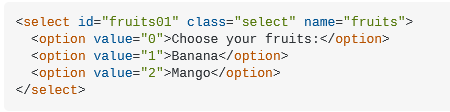 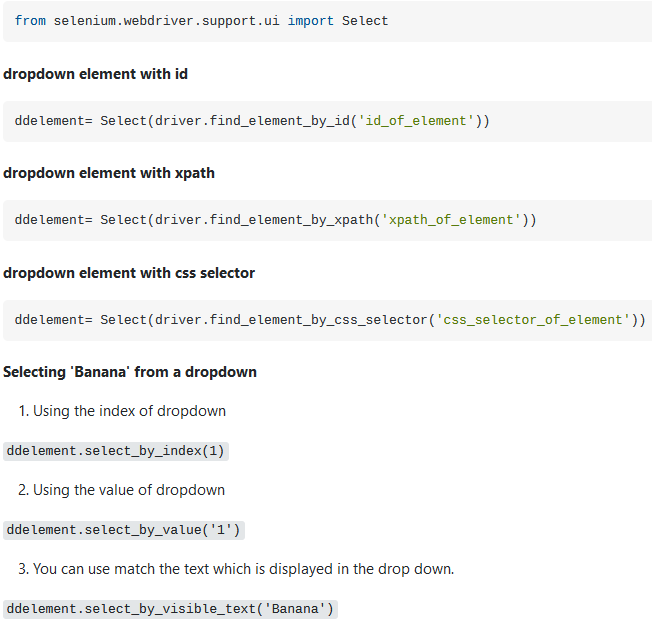


## Guía

https://selenium-python.readthedocs.io/getting-started.html#simple-usage


## Avoiding getting blocked while scraping

https://www.codementor.io/@scrapingdog/10-tips-to-avoid-getting-blocked-while-scraping-websites-16papipe62

https://ichi.pro/es/el-manual-completo-para-el-web-scraping-legal-y-etico-en-2021-69178542830388


## Bibliografía

https://www.oreilly.com/library/view/web-scraping-with/9781491985564/























# SCRAPY

https://scrapy.org/

## Rotating proxies

https://www.scrapehero.com/how-to-rotate-proxies-and-ip-addresses-using-python-3/

## Configuración y mierdas

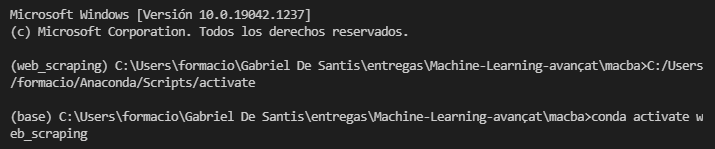

## Documentar Datasets según Kaggle

Contexto, título de dataset, descripción del dataset, representación gráfica, contenido, agradecimientos, inspiración, licencia, código y dataset.

**Ejemplos**: 
- https://github.com/danivb/tipologia-y-ciclo-de-vida-datos-prctica1
- https://github.com/danivb/tipologia-y-ciclo-de-vida-datos-prctica1/blob/master/respuestas/respuestas.pdf